# DELGT-01 Well Logs 

In [1]:
from sys import stdout
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   
#matplotlib ipympl



In [2]:
#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

In [3]:
# Reading LAS files (.las version 2)
bhp = lasio.read(os.path.join('../data/raw/delgt01/delgt01_BHP.las'))
cbl = lasio.read(os.path.join('../data/raw/delgt01/delgt01_CBL.las'))
mrex_cbw = lasio.read(os.path.join('../data/raw/delgt01/delgt01_mrex_cbw.las'))
mrex_pplo = lasio.read(os.path.join('../data/raw/delgt01/delgt01_mrex_pplo.las'))
sl = lasio.read(os.path.join('../data/raw/delgt01/delgt01_SL.las'))
uxpl_gxpl = lasio.read(os.path.join('../data/raw/delgt01/delgt01_UXPL_GXPL.las'))
xmac_hdil = lasio.read(os.path.join('../data/raw/delgt01/delgt01_XMAC_HDIL.las'))
zdl_cn = lasio.read(os.path.join('../data/raw/delgt01/delgt01_ZDL_CN.las'))

In [4]:
# Reading the .csv file containing core depths  

cores = pd.read_csv('../data/raw/delgt01/delgt01_core_depths.csv')
cores.head(10)

,Core Number,Top Depth,Bottom Depth,Length
0,C1,2511.5,2526.90,15.40
1,C2,2576.0,2591.09,15.09
2,C3,2594.5,2597.01,2.51
3,C4,2597.5,2609.82,12.32
4,C5,2610.5,2617.82,7.32
5,C6,2618.0,2641.94,23.94
6,C7,2642.0,2651.00,9.00


In [5]:
# (x1, x2), (bottom, top), 'color'
core_segments = [
     (0, 0), (cores['Bottom Depth'][0], cores['Top Depth'][0]), 'cyan',
     (0, 0), (cores['Bottom Depth'][1], cores['Top Depth'][1]), 'purple', 
     (0, 0), (cores['Bottom Depth'][2], cores['Top Depth'][2]), 'green',
     (0, 0), (cores['Bottom Depth'][3], cores['Top Depth'][3]), 'red',
     (0, 0), (cores['Bottom Depth'][4], cores['Top Depth'][4]), 'orange',
     (0, 0), (cores['Bottom Depth'][5], cores['Top Depth'][5]), 'magenta',
     (0, 0), (cores['Bottom Depth'][6], cores['Top Depth'][6]), 'blue']

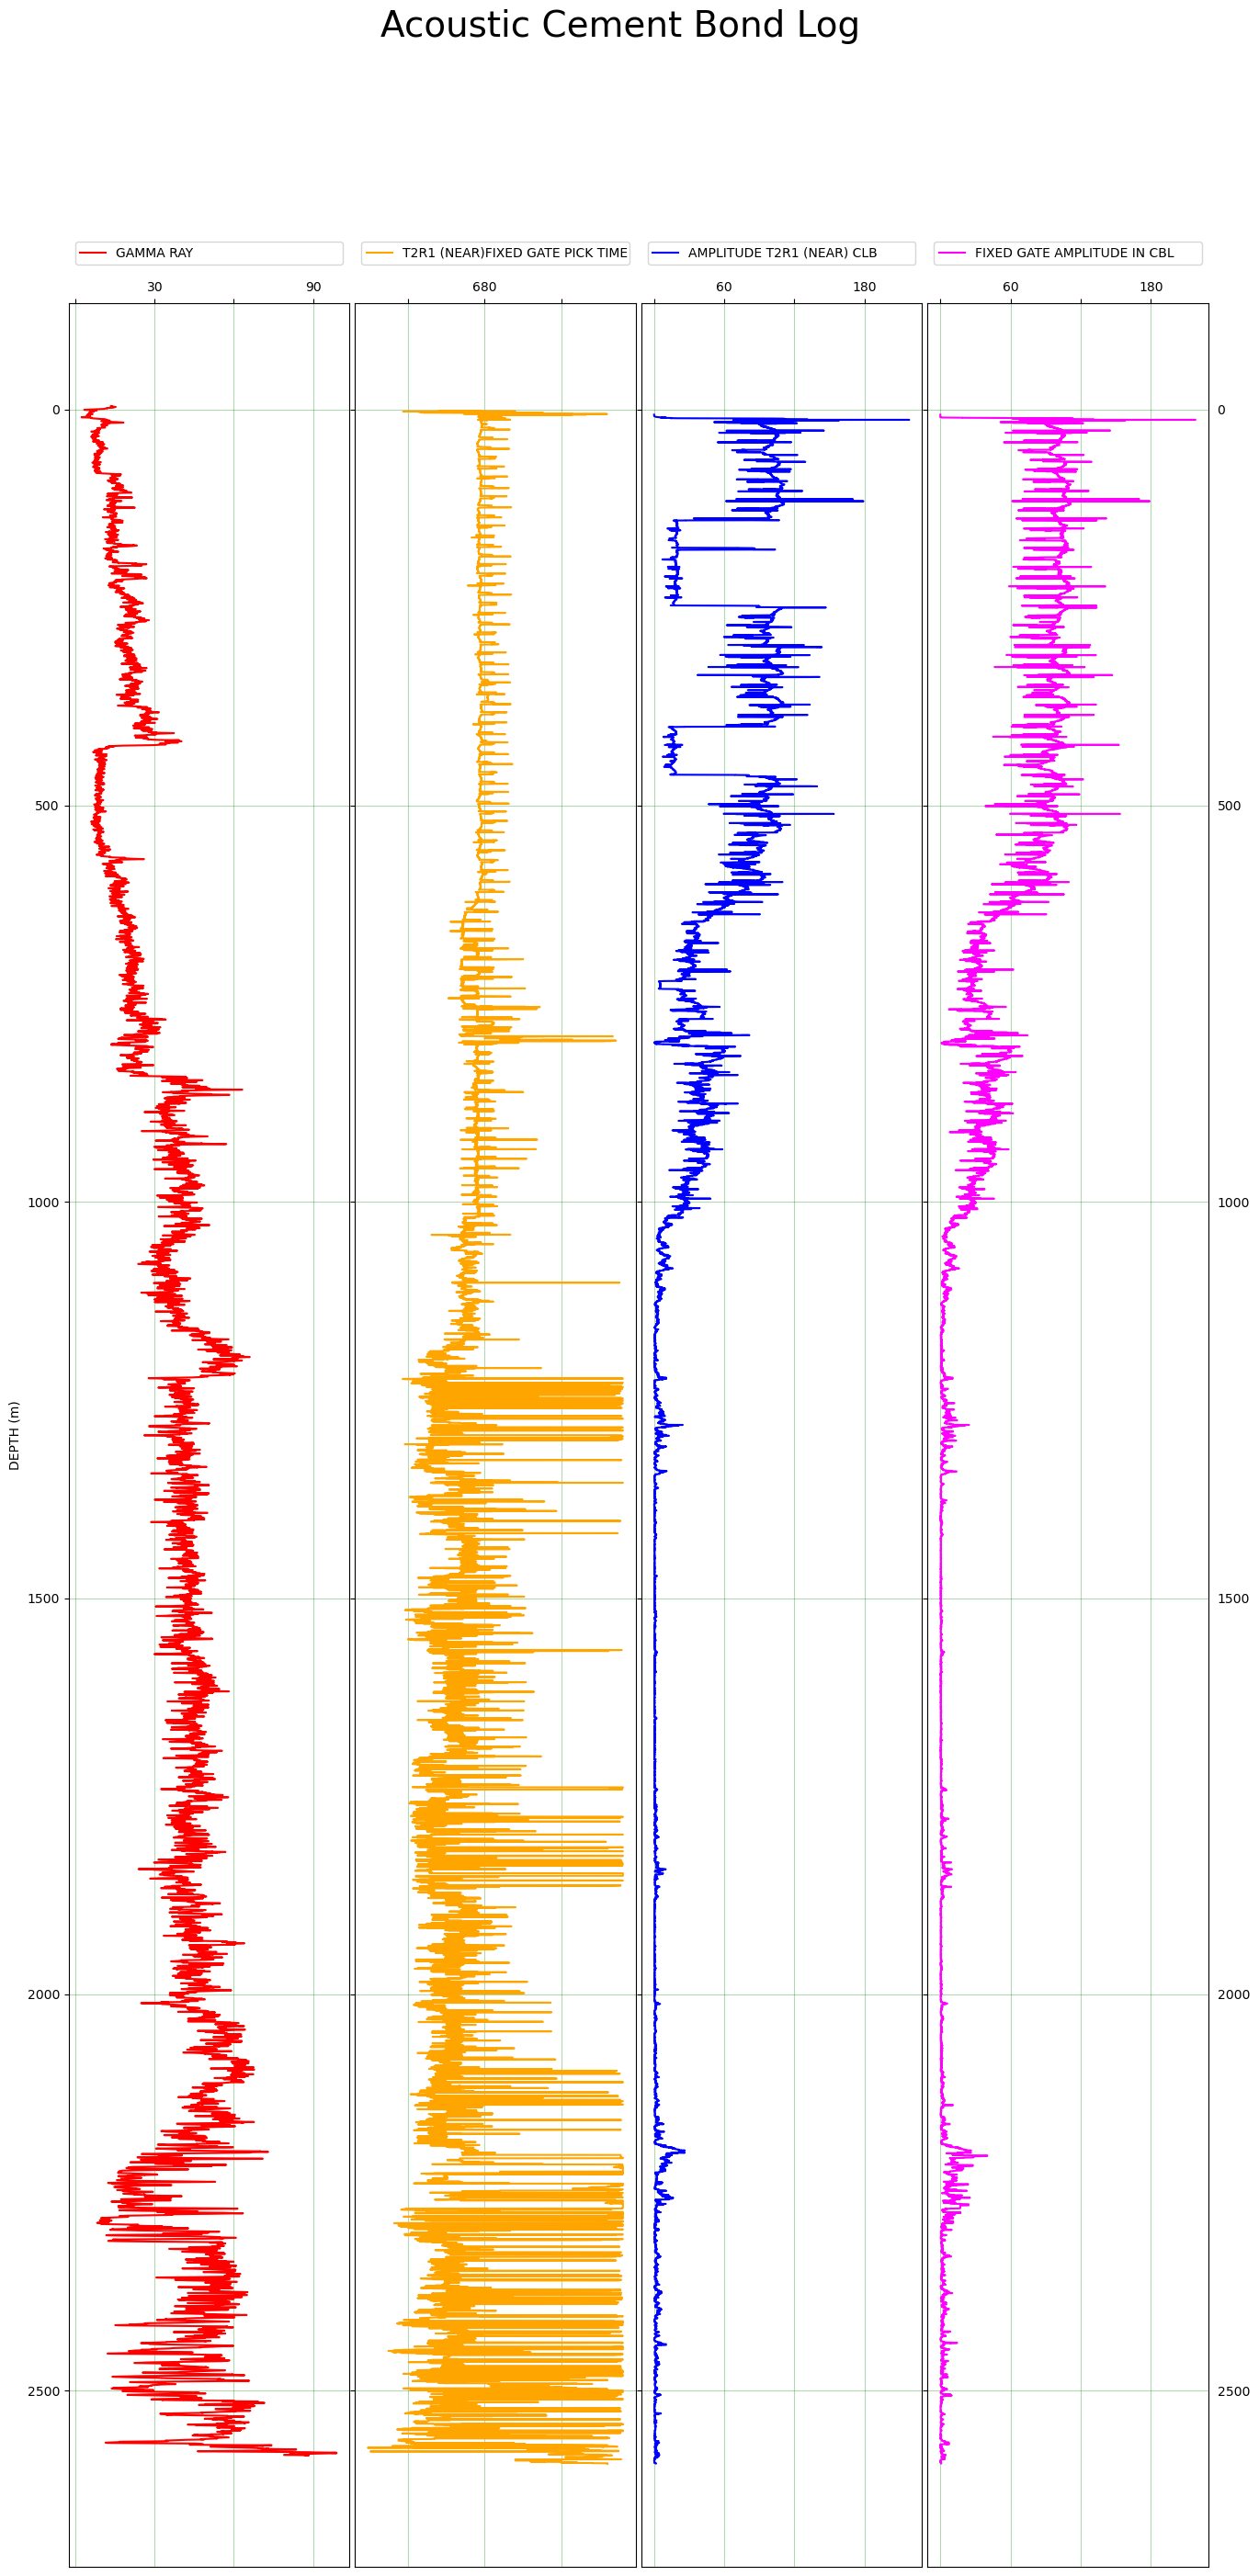

In [6]:
# Acoustic Cement Bond Log

f1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f1.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f1.suptitle('Acoustic Cement Bond Log', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(cbl['GR'], cbl['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(cbl['FGPCBLQI'], cbl['DEPT'],'orange', label='T2R1 (NEAR)FIXED GATE PICK TIME')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(cbl['AMPCBQI'], cbl['DEPT'],'b', label='AMPLITUDE T2R1 (NEAR) CLB')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(cbl['FGACBLQI'], cbl['DEPT'],'magenta', label='FIXED GATE AMPLITUDE IN CBL')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell

plt.show()

# Uncomment to save the figure
#f1.savefig('delgt01-CBL.png', bbox_inches='tight', dpi=400)



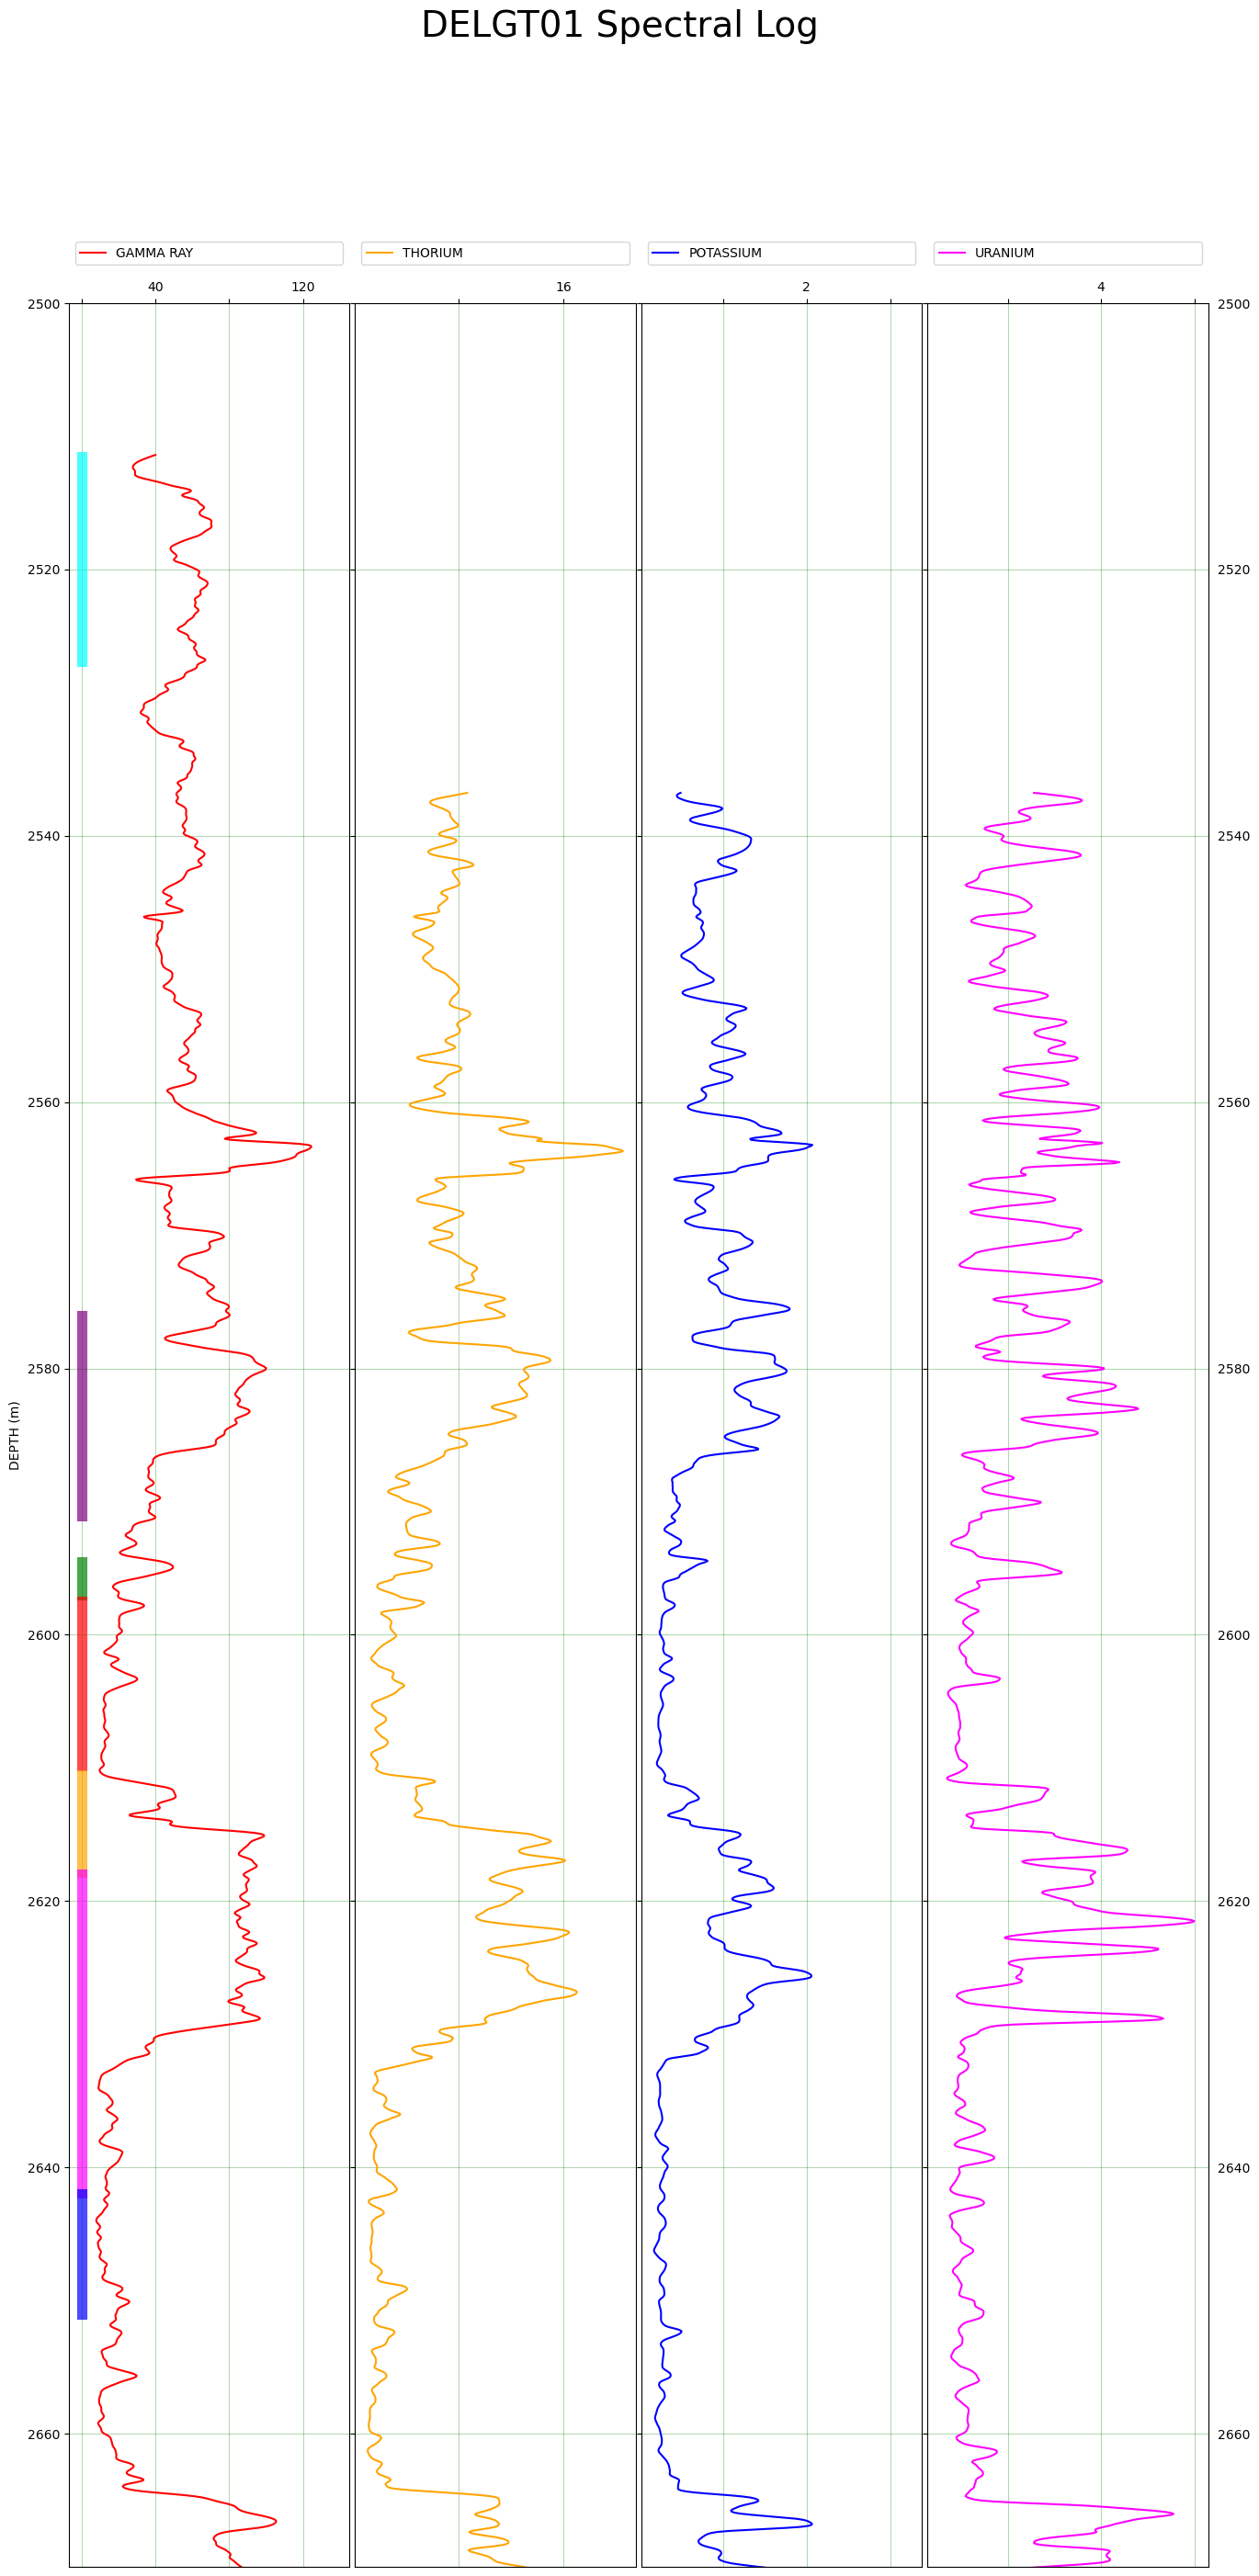

In [18]:
# Spectral Log

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f2.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f2.suptitle('DELGT01 Spectral Log', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(sl['GR'], sl['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(sl['TH'], sl['DEPT'],'orange', label='THORIUM')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(sl['K'], sl['DEPT'],'b', label='POTASSIUM')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(sl['U'], sl['DEPT'],'magenta', label='URANIUM')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f2.savefig('delgt01-SL-cores.png', bbox_inches='tight', dpi=400)

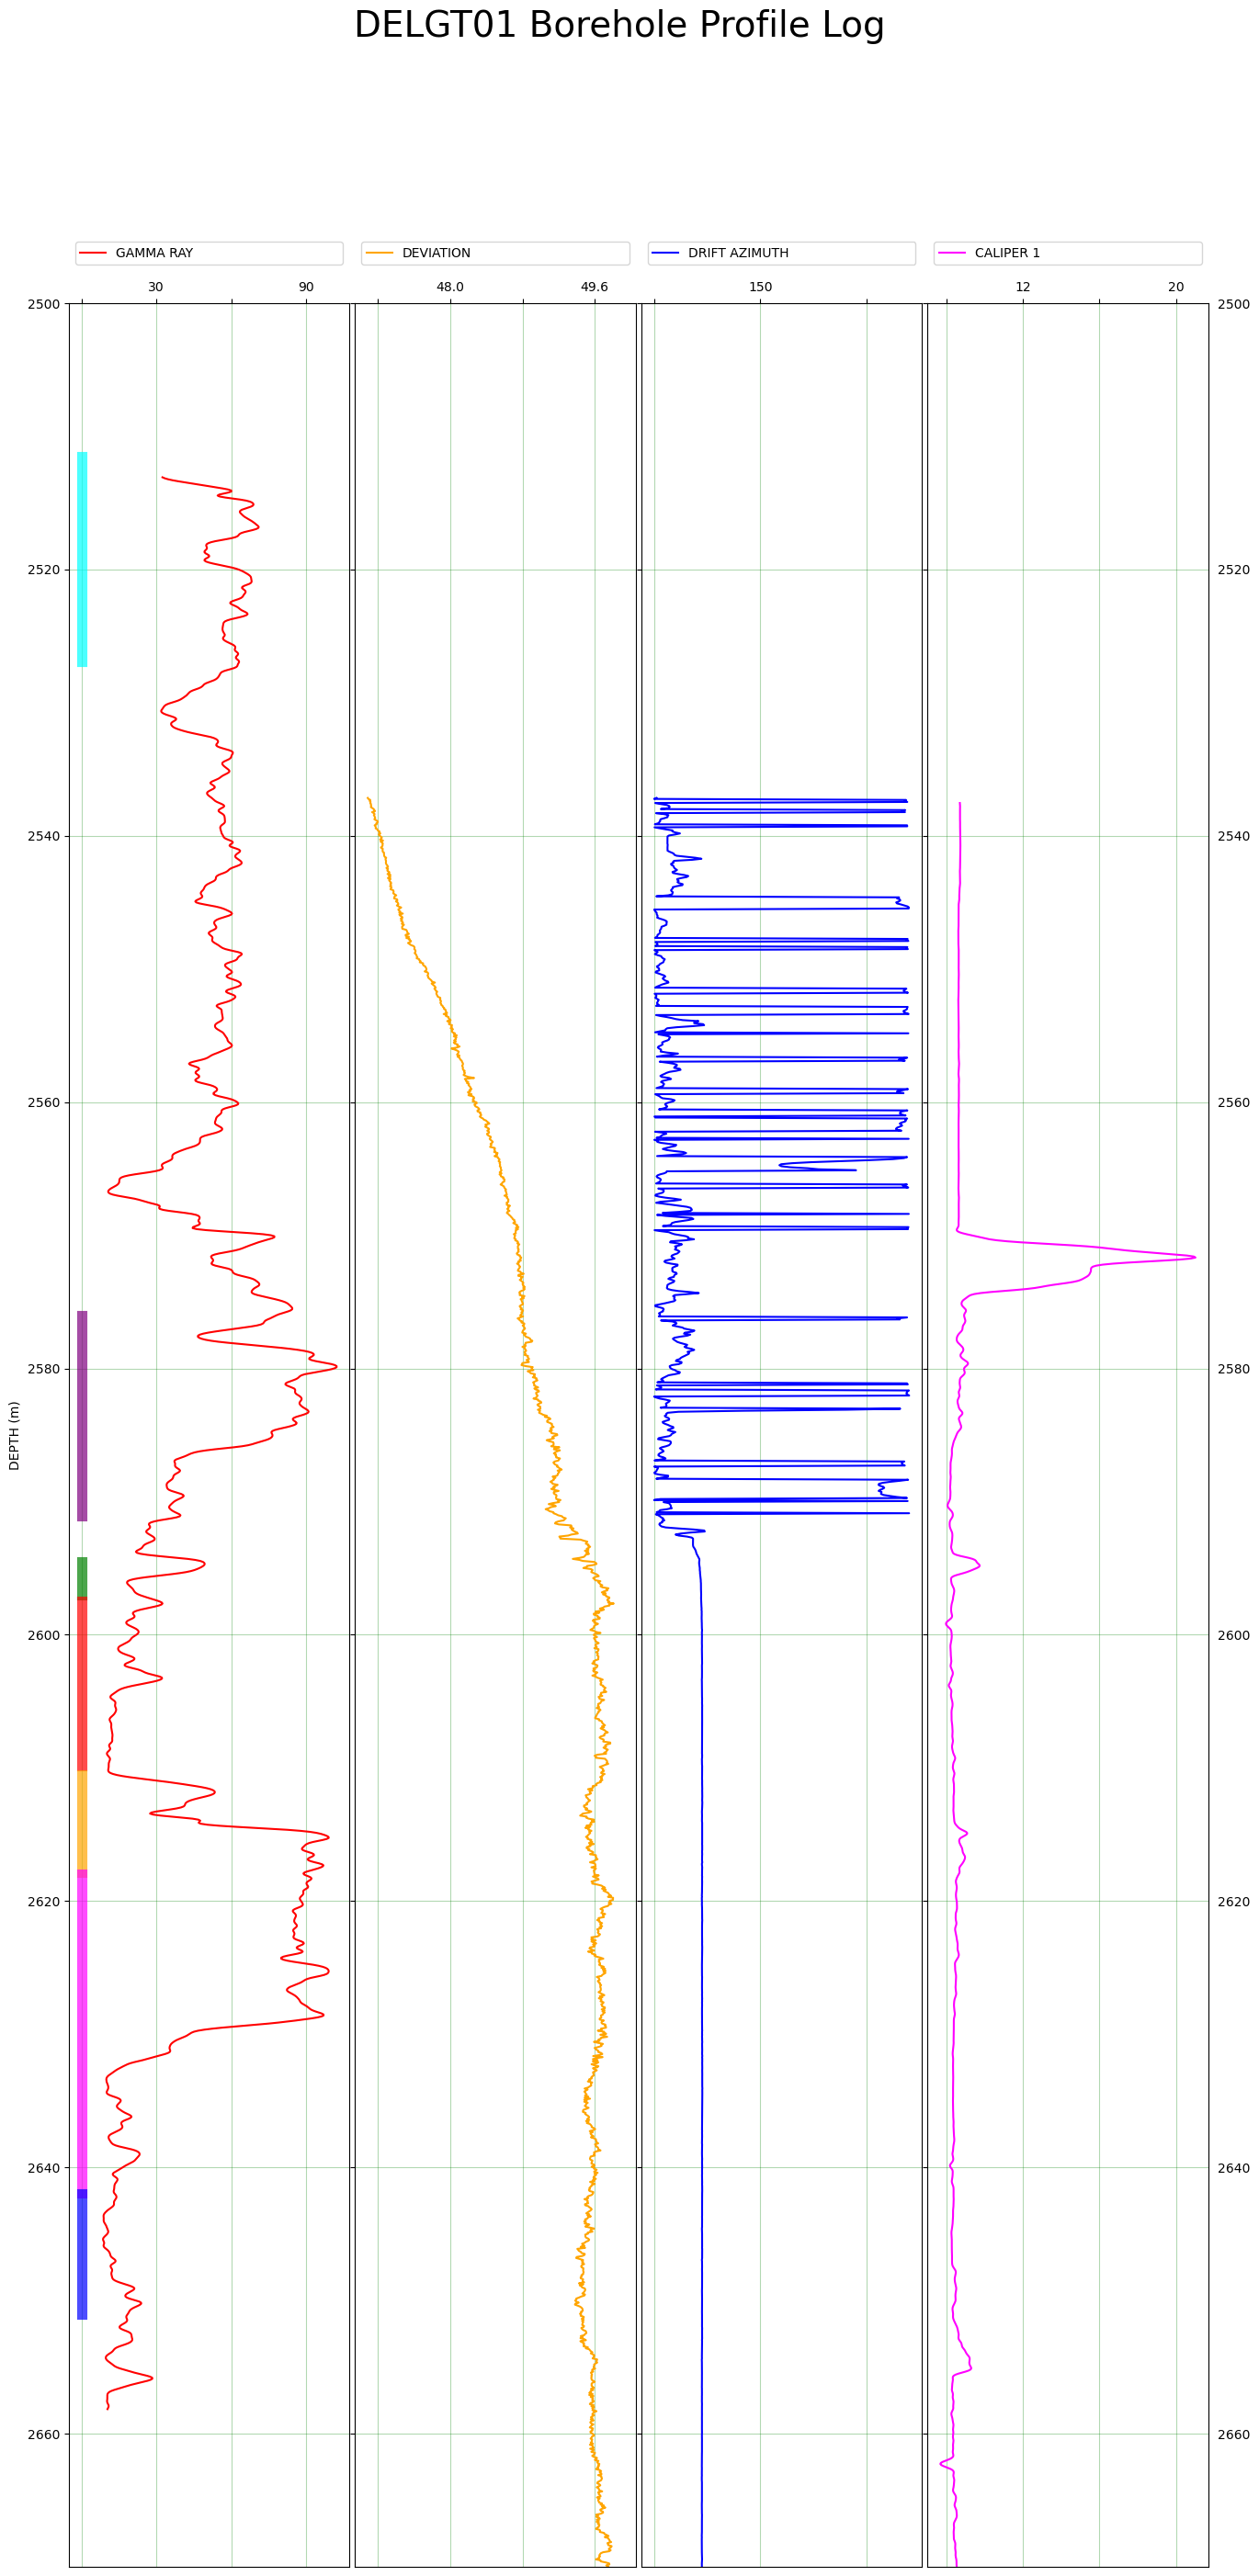

In [19]:
# Borehole Profile

f3, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f3.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f3.suptitle('DELGT01 Borehole Profile Log', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(bhp['GR'], bhp['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(bhp['DEVW'], bhp['DEPT'],'orange', label='DEVIATION')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(bhp['DAZW'], bhp['DEPT'],'b', label='DRIFT AZIMUTH')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(bhp['CAL1W'], bhp['DEPT'],'magenta', label='CALIPER 1')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f3.savefig('delgt01-BHL-cores.png', bbox_inches='tight', dpi=400)

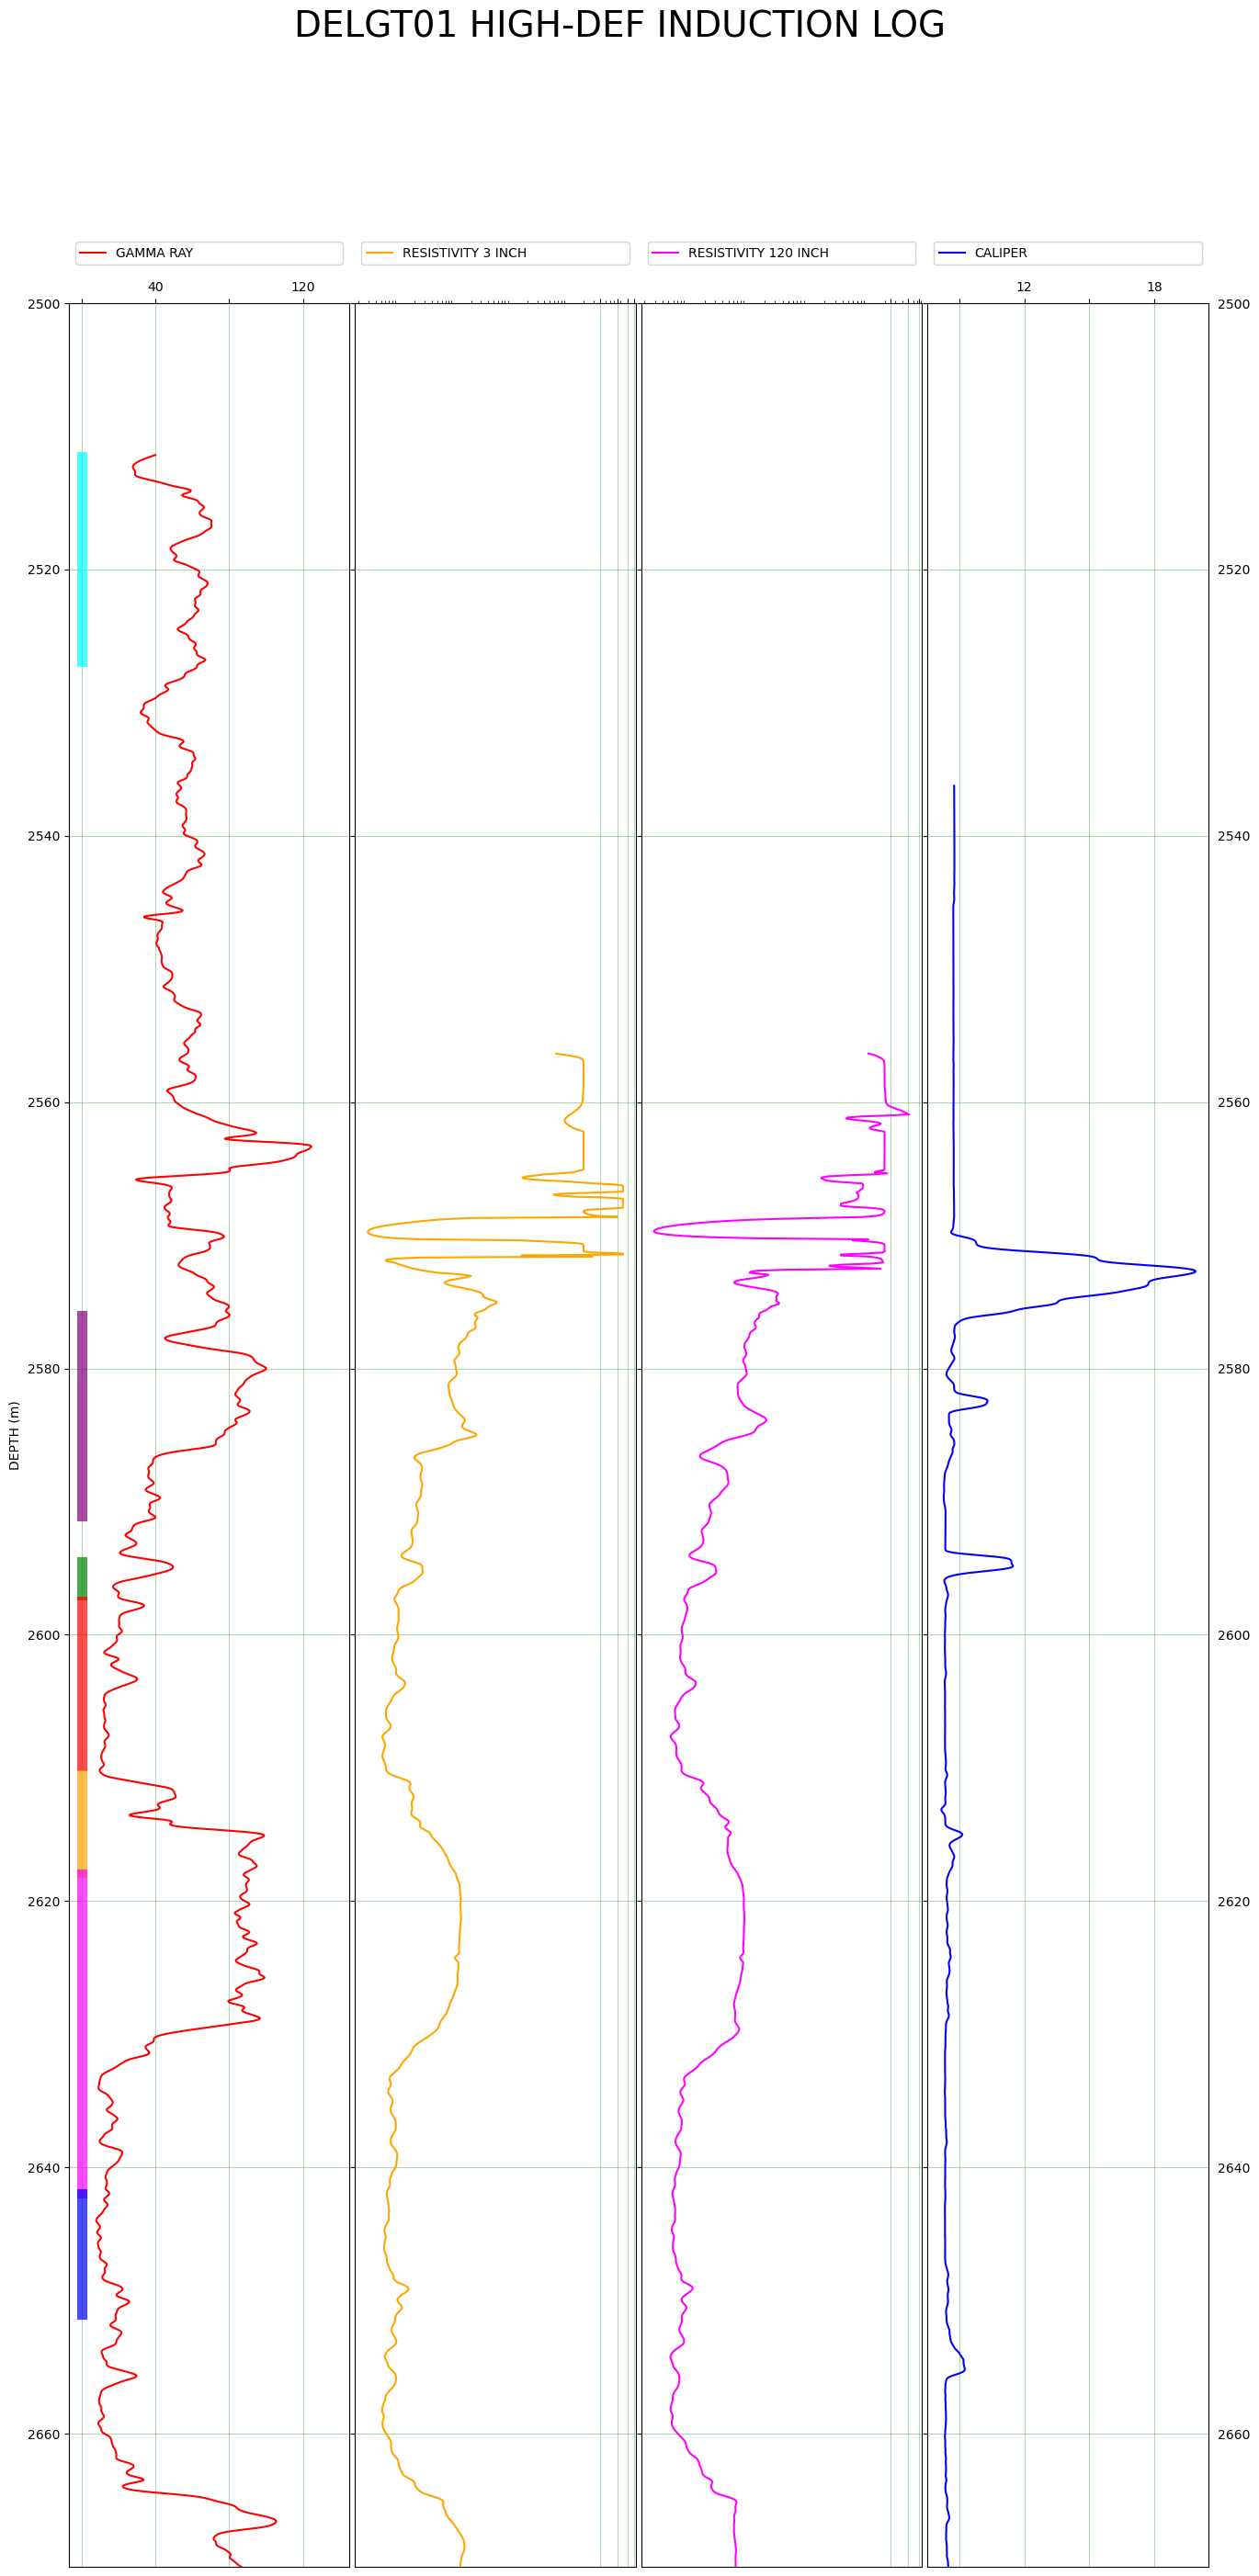

In [20]:
# HIGH DEFINITION INDUCTION LOG

f4, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f4.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f4.suptitle('DELGT01 HIGH-DEF INDUCTION LOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(xmac_hdil['GR'], xmac_hdil['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(xmac_hdil['M2R3'], xmac_hdil['DEPT'],'orange', label='RESISTIVITY 3 INCH')
ax2.xaxis.tick_top()
ax2.set_xscale('log')
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(xmac_hdil['M2RX'], xmac_hdil['DEPT'],'magenta', label='RESISTIVITY 120 INCH')
ax3.xaxis.tick_top()
ax3.set_xscale('log')
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(xmac_hdil['CAL'], xmac_hdil['DEPT'],'blue', label='CALIPER')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f4.savefig('delgt01-HDIL-cores.png', bbox_inches='tight', dpi=400)

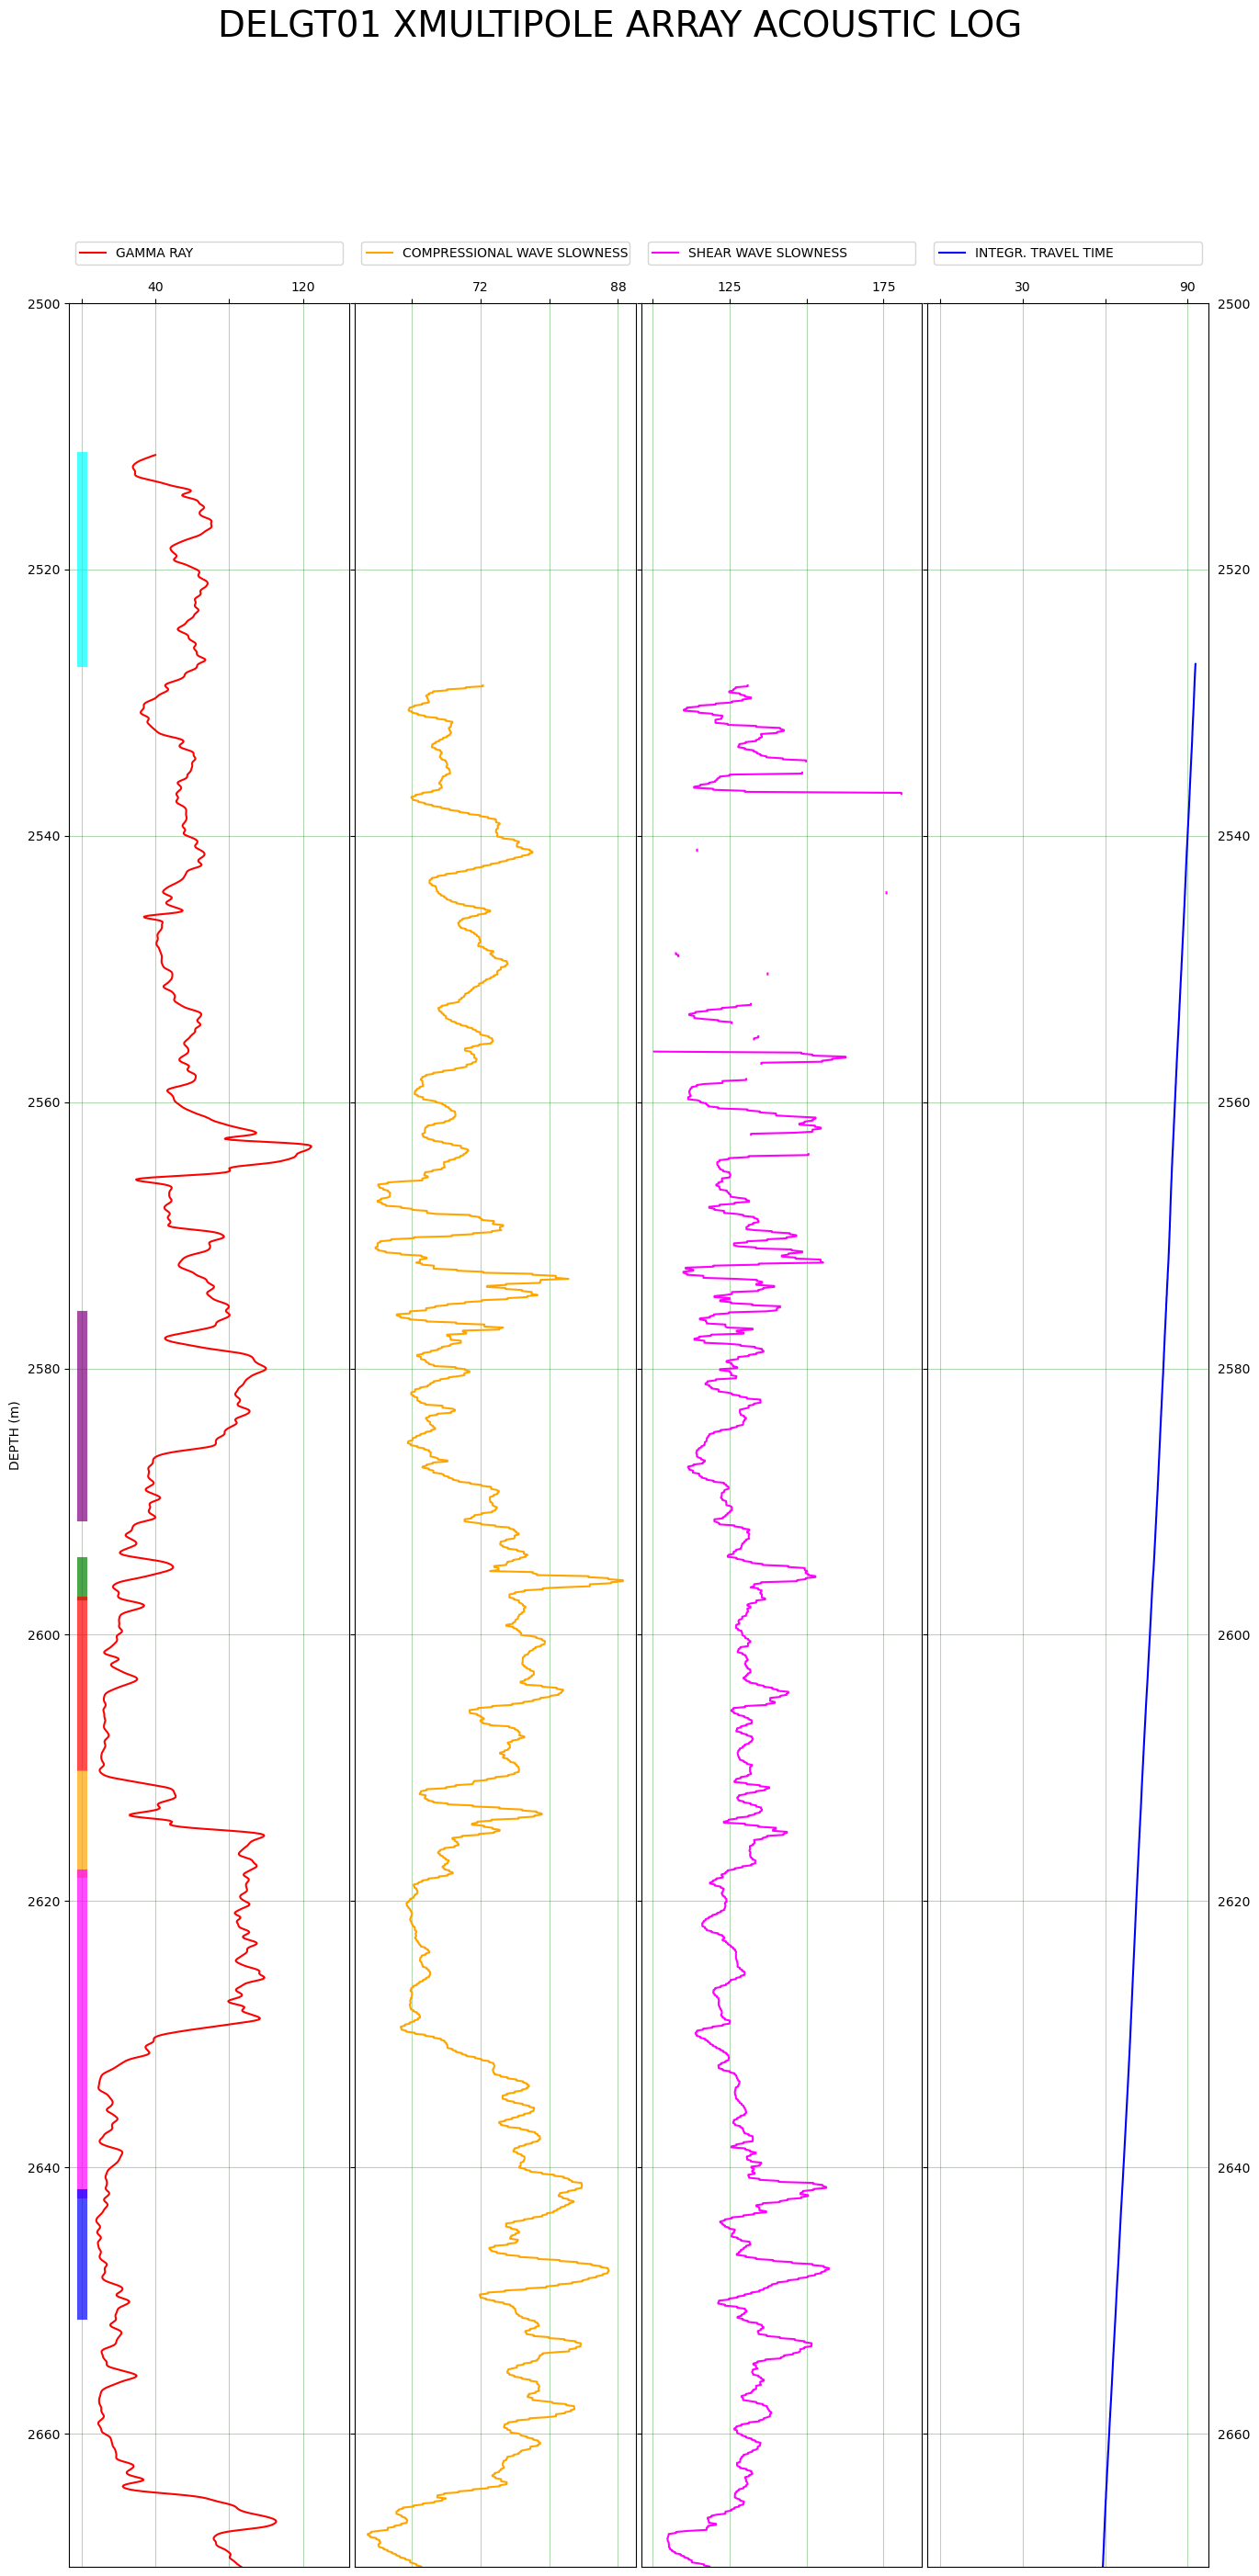

In [21]:
# XMULTIPOLE ARRAY ACOUSTIC LOG

f5, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f5.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f5.suptitle('DELGT01 XMULTIPOLE ARRAY ACOUSTIC LOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(xmac_hdil['GR'], xmac_hdil['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(xmac_hdil['DTCQI'], xmac_hdil['DEPT'],'orange', label='COMPRESSIONAL WAVE SLOWNESS')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(xmac_hdil['DTSQI'], xmac_hdil['DEPT'],'magenta', label='SHEAR WAVE SLOWNESS')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(xmac_hdil['TTQI'], xmac_hdil['DEPT'],'blue', label='INTEGR. TRAVEL TIME')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f5.savefig('delgt01-XMAC-cores.png', bbox_inches='tight', dpi=400)

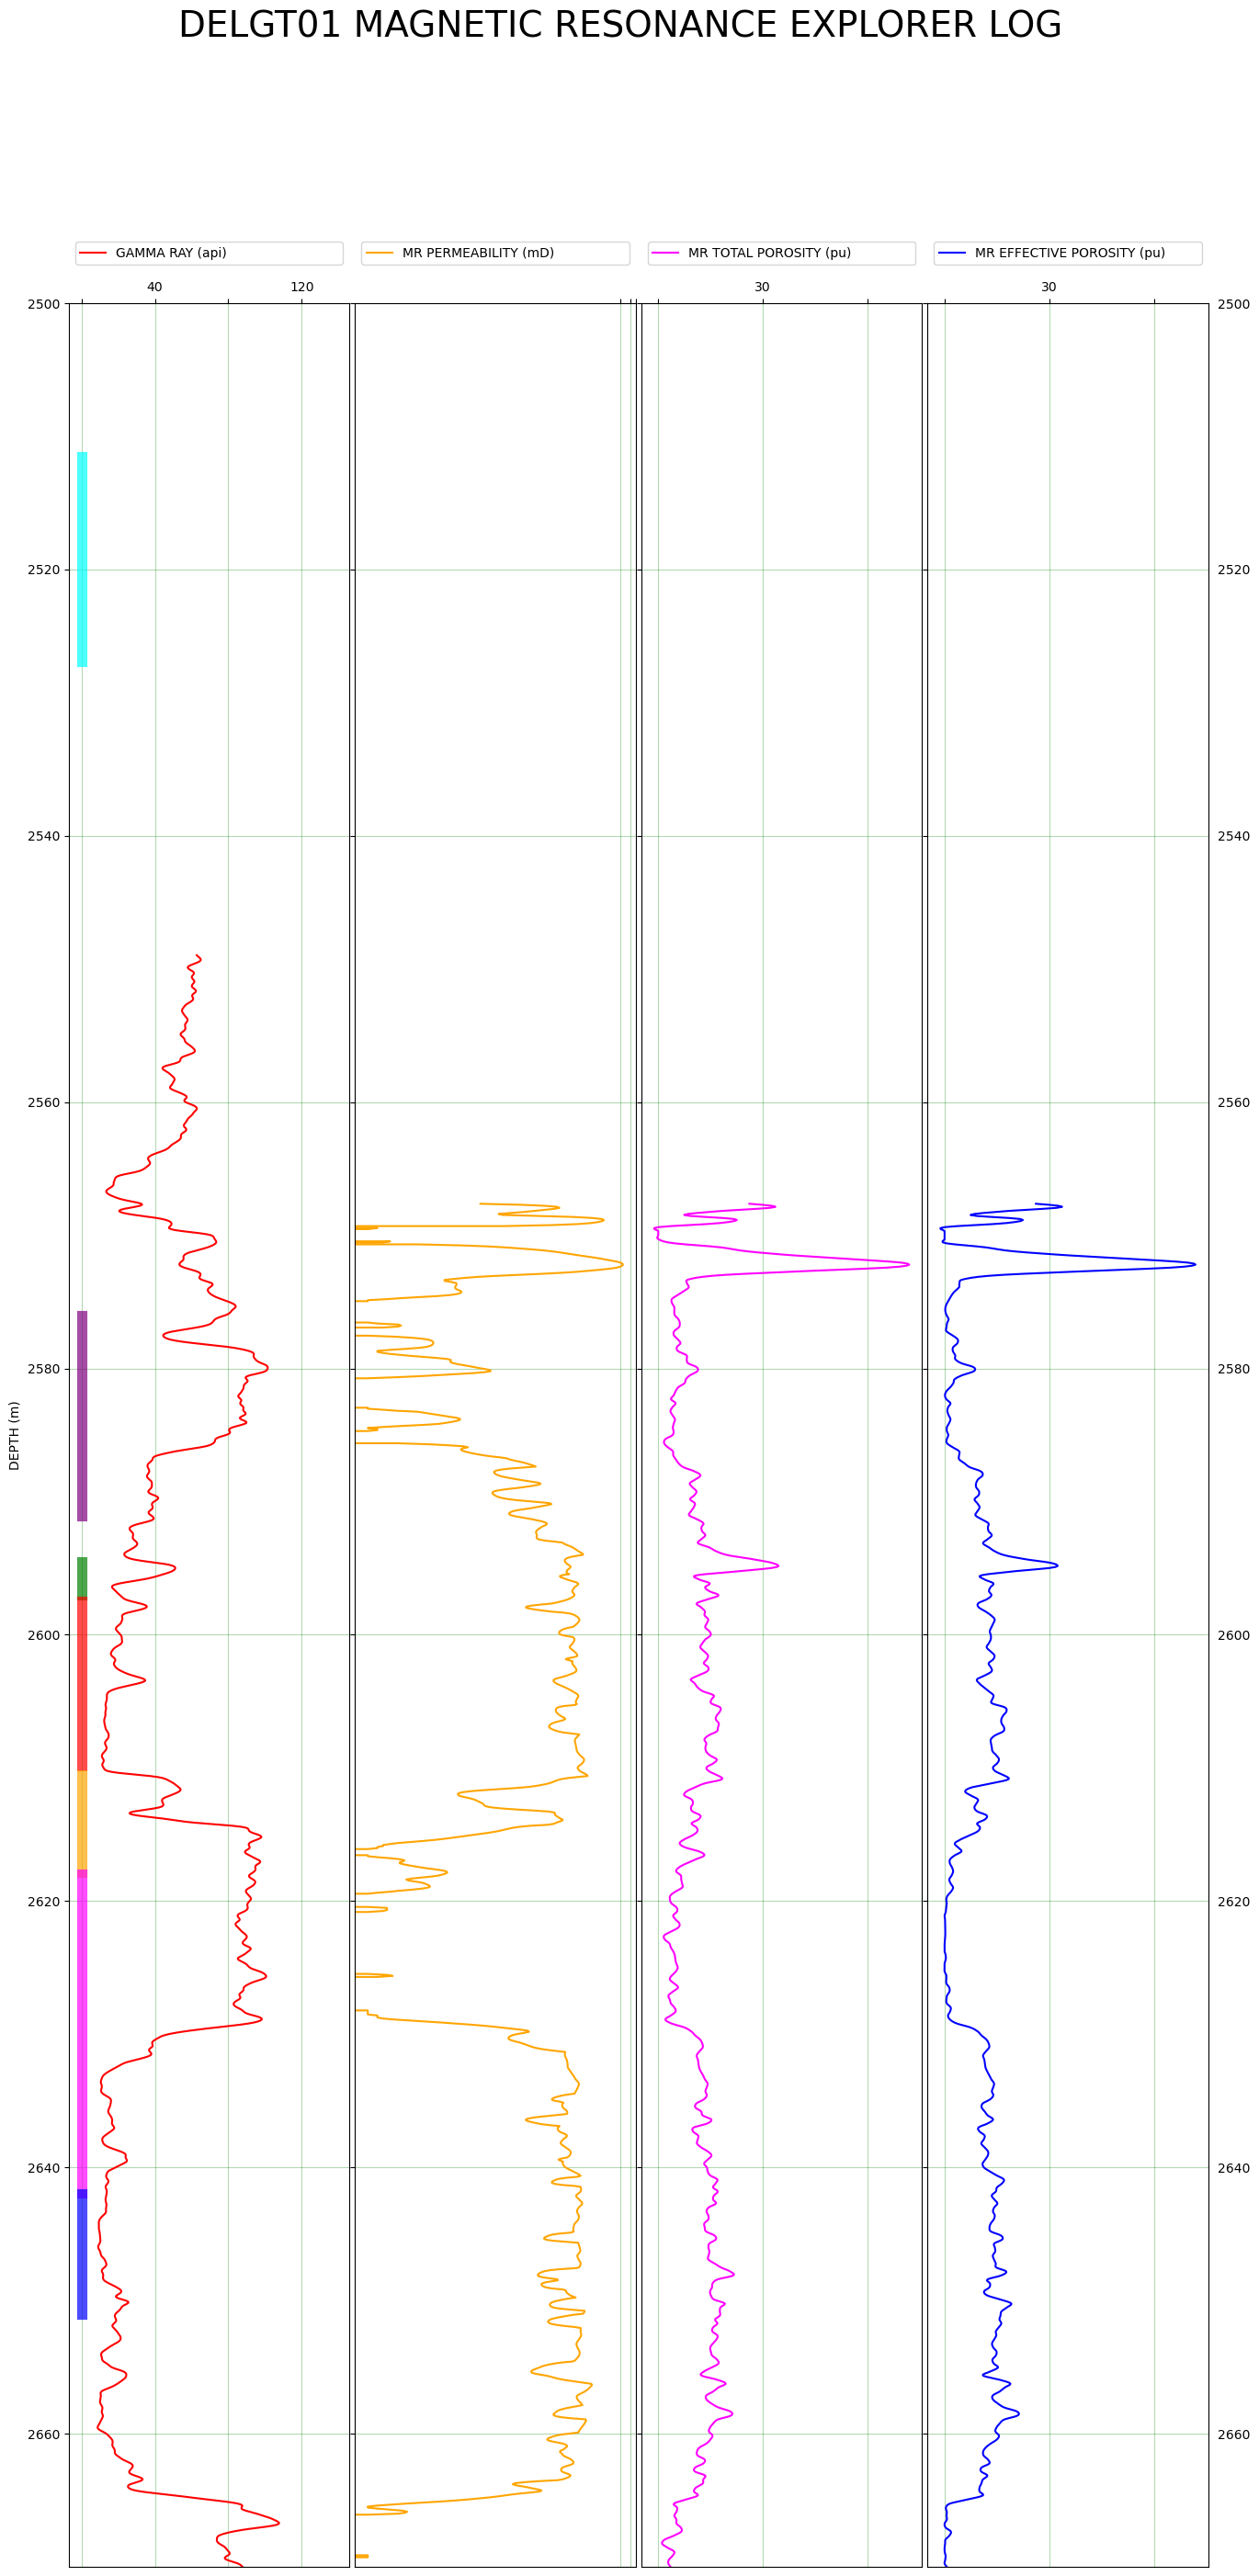

In [22]:
# MAGNETIC RESONANCE EXPLORER LOG

f6, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f6.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f6.suptitle('DELGT01 MAGNETIC RESONANCE EXPLORER LOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(mrex_cbw['GR'], mrex_cbw['DEPT'],'r', label='GAMMA RAY (api)')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(mrex_cbw['MPRM'], mrex_cbw['DEPT'],'orange', label='MR PERMEABILITY (mD)')
ax2.xaxis.tick_top()
ax2.set_xscale('log')
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(mrex_cbw['MPHS'], mrex_cbw['DEPT'],'magenta', label='MR TOTAL POROSITY (pu)')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(mrex_cbw['MPHE'], mrex_cbw['DEPT'],'blue', label='MR EFFECTIVE POROSITY (pu)')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f6.savefig('delgt01-mrex_cbw_por_perm-cores.png', bbox_inches='tight', dpi=400)

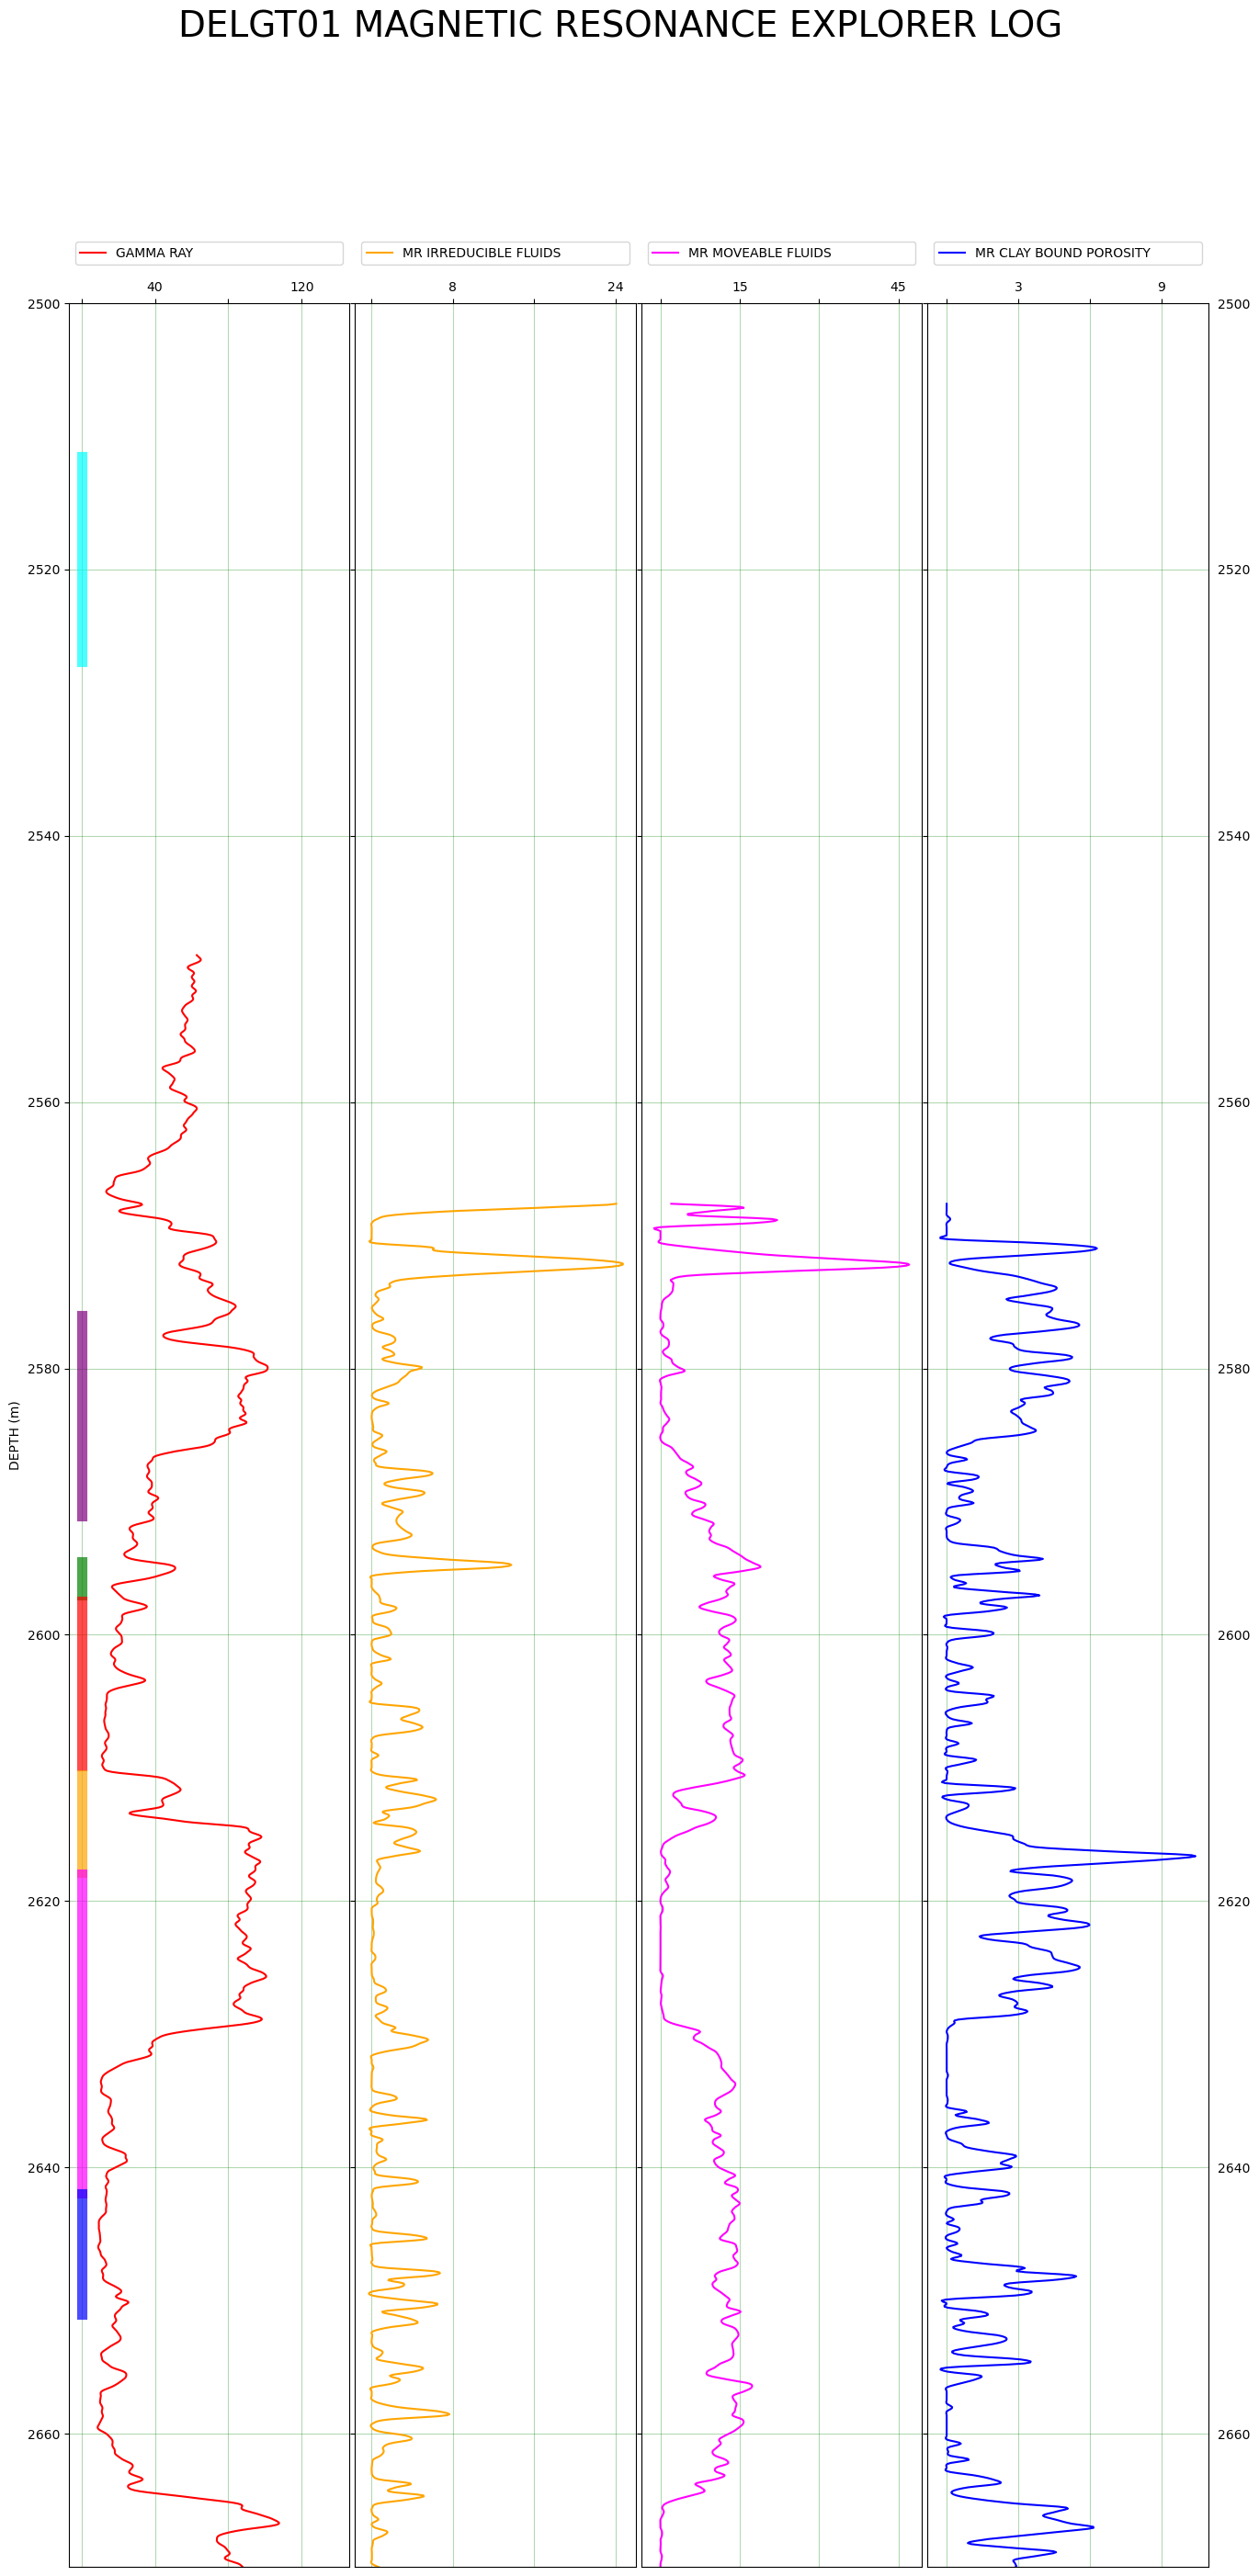

In [23]:
# MAGNETIC RESONANCE EXPLORER LOG

f7, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f7.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f7.suptitle('DELGT01 MAGNETIC RESONANCE EXPLORER LOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(mrex_cbw['GR'], mrex_cbw['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(mrex_cbw['MBVI'], mrex_cbw['DEPT'],'orange', label='MR IRREDUCIBLE FLUIDS')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(mrex_cbw['MBVM'], mrex_cbw['DEPT'],'magenta', label='MR MOVEABLE FLUIDS')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(mrex_cbw['MCBW'], mrex_cbw['DEPT'],'blue', label='MR CLAY BOUND POROSITY')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f7.savefig('delgt01-mrex_cbw_fluids-cores.png', bbox_inches='tight', dpi=400)

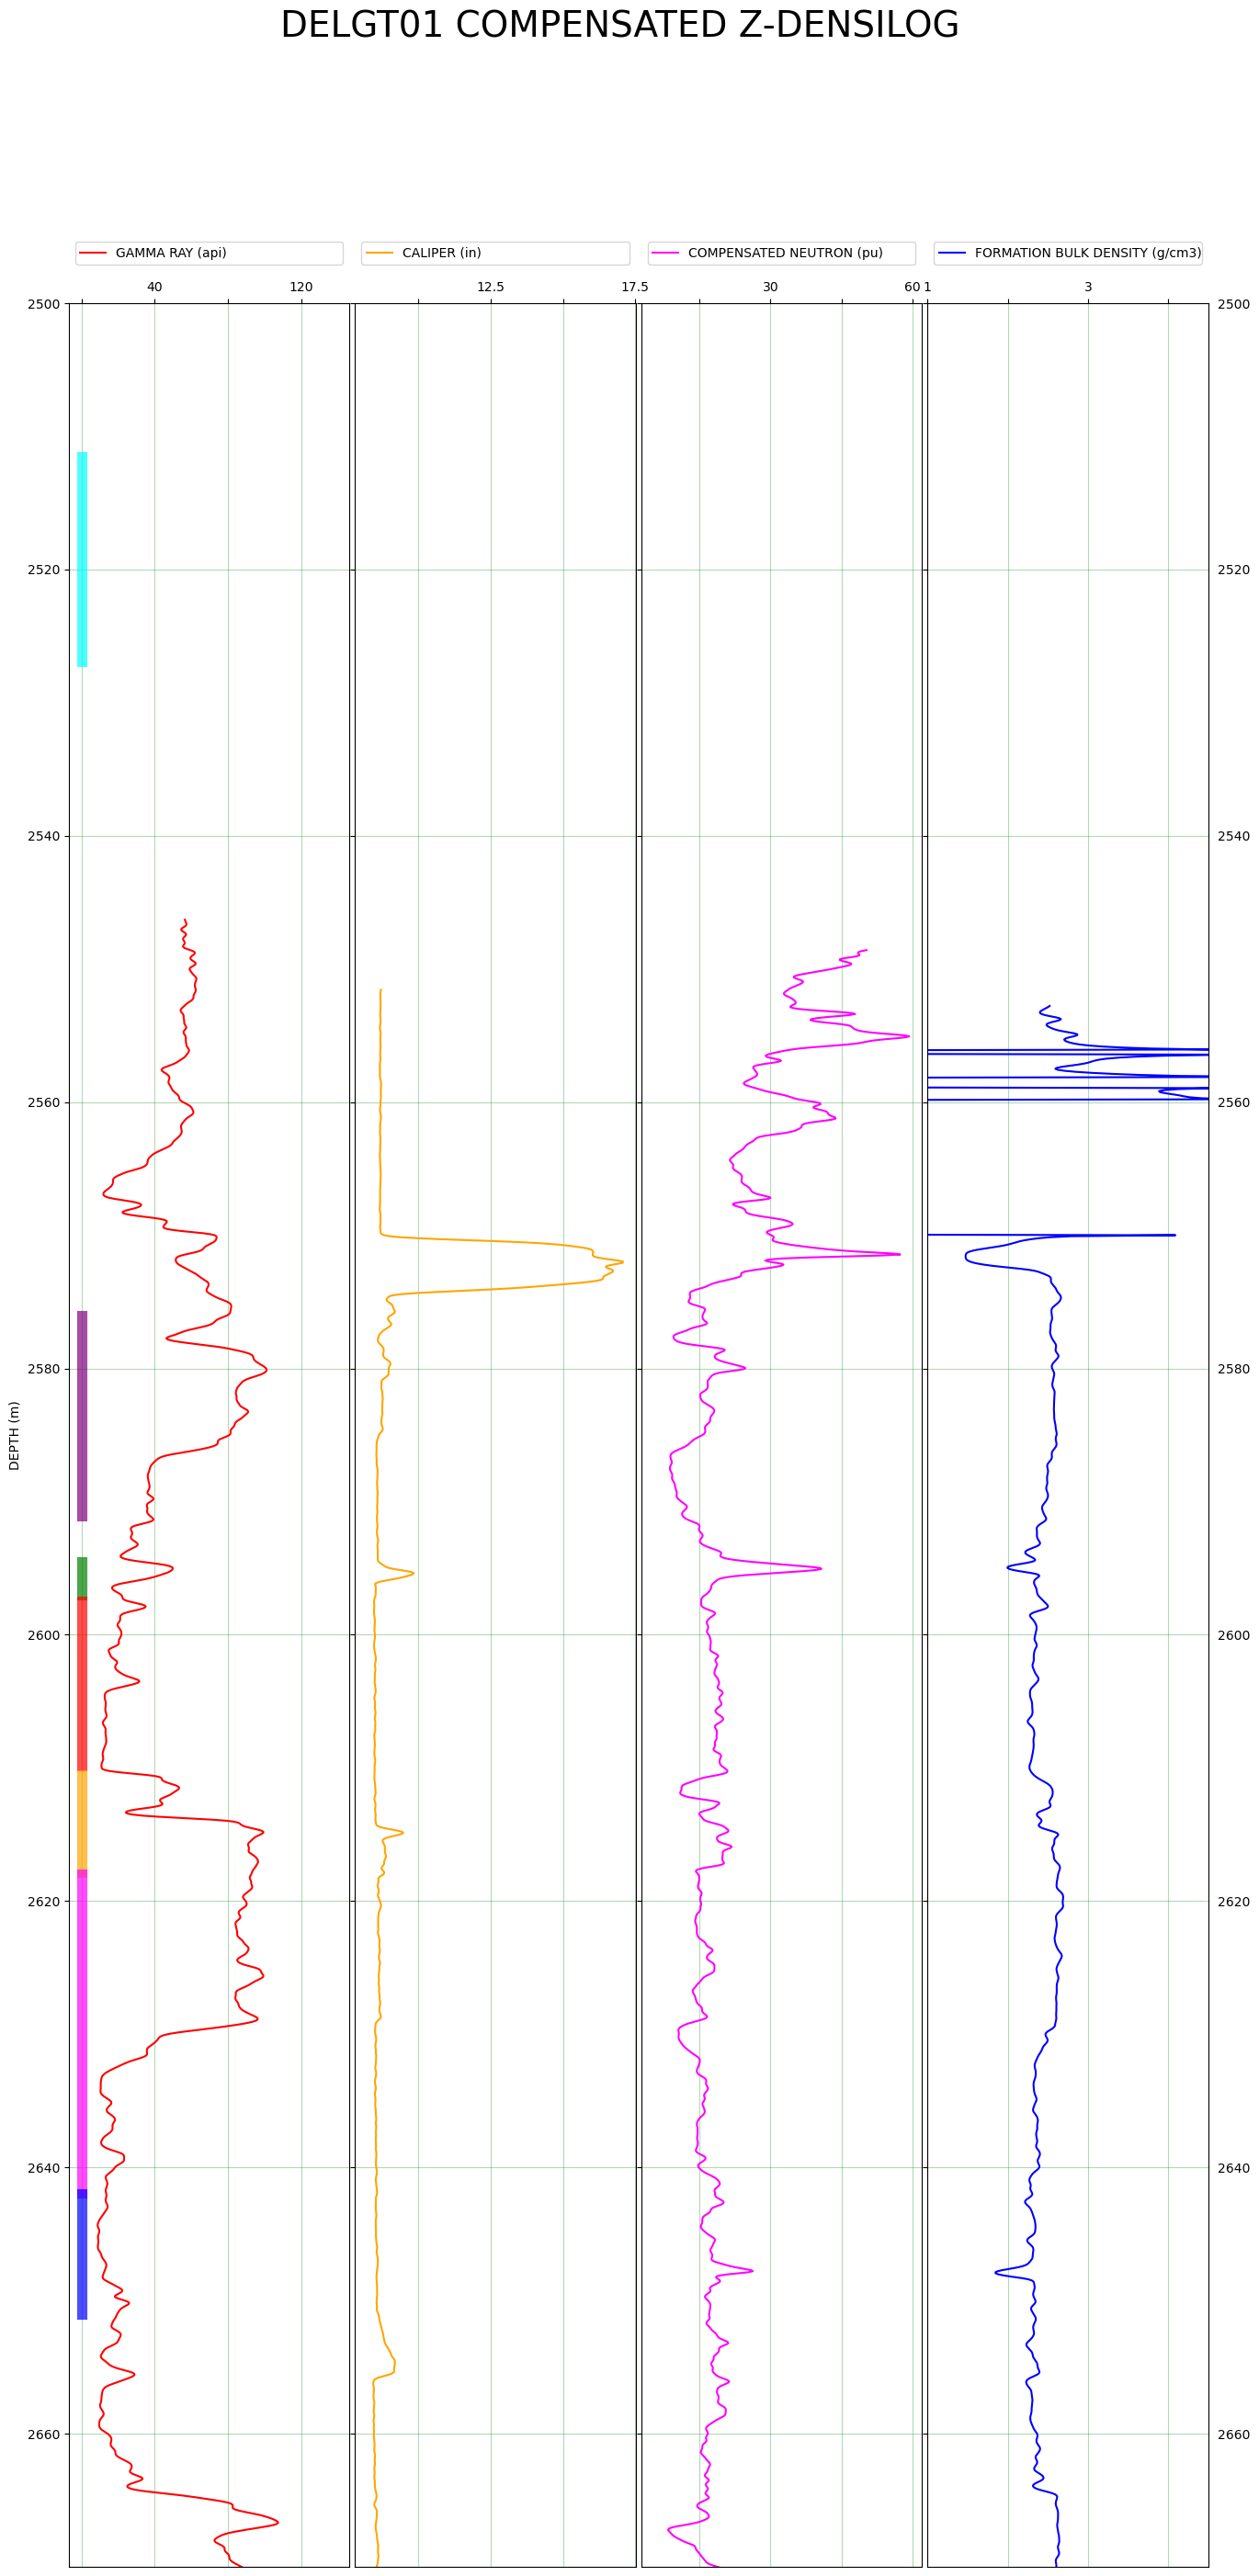

In [24]:
# COMPENSATED Z-DENSILOG

f8, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f8.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f8.suptitle('DELGT01 COMPENSATED Z-DENSILOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=8,alpha=0.7) #cores
ax1.plot(zdl_cn['GR'], zdl_cn['DEPT'],'r', label='GAMMA RAY (api)')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(zdl_cn['CALX'], zdl_cn['DEPT'],'orange', label='CALIPER (in)')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(zdl_cn['CN'], zdl_cn['DEPT'],'magenta', label='COMPENSATED NEUTRON (pu)')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(zdl_cn['ZDEN'], zdl_cn['DEPT'],'blue', label='FORMATION BULK DENSITY (g/cm3)')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.set_xlim(1, 4.5)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

f8.savefig('delgt01-zdl_cn-cores.png', bbox_inches='tight', dpi=400)

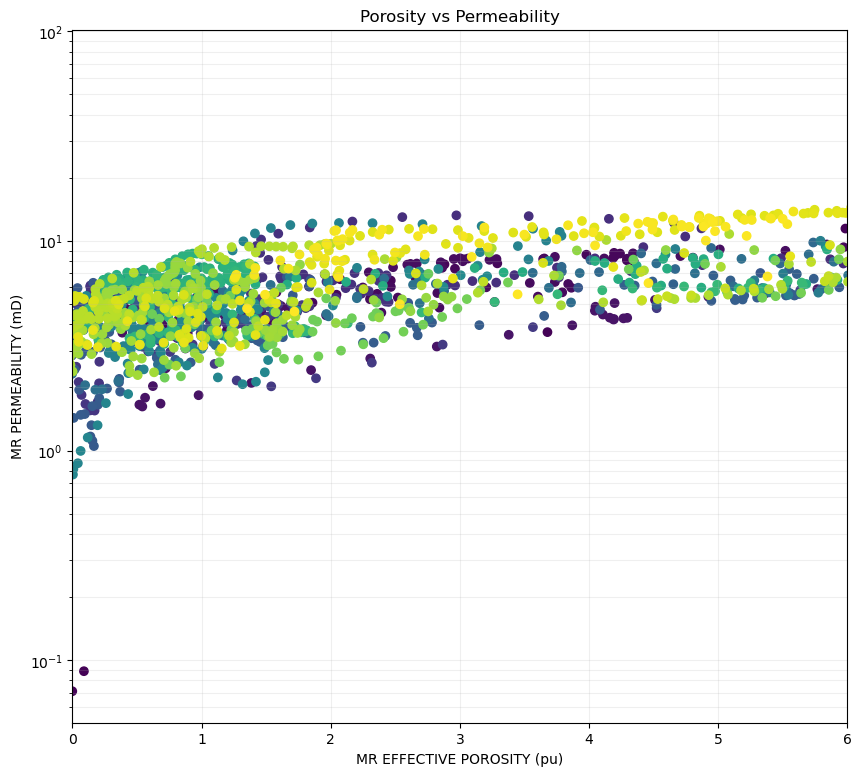

In [14]:
plt.figure(figsize=(10,9))
#scatter = plt.scatter(mrex_cbw['MPRM'],
scatter = plt.scatter(mrex_cbw['MPHE'],
            mrex_cbw['MPHS'],
            c=mrex_cbw['DEPT'])
plt.grid(True, which ="both",alpha=0.2)
#plt.xlabel('MR TOTAL POROSITY (pu)')
plt.xlabel('MR EFFECTIVE POROSITY (pu)')
plt.ylabel('MR PERMEABILITY (mD)')
plt.title('Porosity vs Permeability')
plt.yscale('log')
plt.xlim(0, 6)

plt.savefig('por_perm_crossplot.png', bbox_inches='tight', dpi=300)
plt.show()
